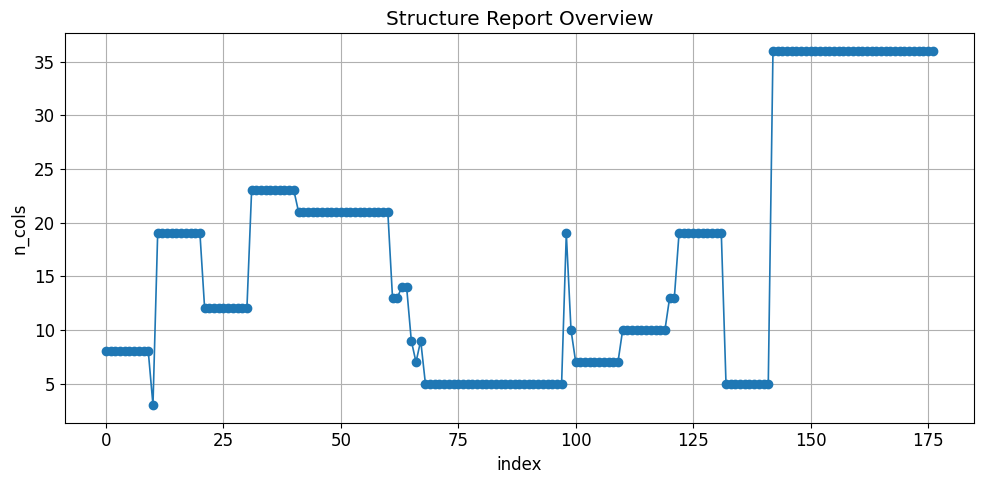

Symbol   TF  Segments  Zhongshu  Signals
0  BTCUSDT   5m       112        18      259
1  BTCUSDT  15m       116        22      259
2  BTCUSDT  30m       105        20      259
3  BTCUSDT   1h        64        16      259
4  BTCUSDT   4h        17         5      259
5  ETHUSDT   5m       408        73      587
6  ETHUSDT  15m       256        50      587
7  ETHUSDT  30m       142        32      587
8  ETHUSDT   1h        78        15      587
9  ETHUSDT   4h        20         4      587

[saved] summary_counts.csv


In [17]:
# --- 全局结构报告 + 统计表 ---
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ROOT = Path.cwd().resolve()
STRUCT_REPORT = ROOT / "chan_structure_report.csv"
SEG_FAST = ROOT / "chan_data/segments/fast"
ZS_FAST  = ROOT / "chan_data/zhongshu_hierarchy_fast"
SIGNALS  = ROOT / "chan_data/signals"
DATA     = ROOT / "DATA"

symbols = ["BTCUSDT", "ETHUSDT"]
tfs = ["5m","15m","30m","1h","4h"]

# === 图 1 ===
try:
    df_report = pd.read_csv(STRUCT_REPORT)
    plt.figure(figsize=(10,5))
    plt.plot(range(len(df_report)), df_report["n_cols"], marker="o", lw=1.2)
    plt.title("Structure Report Overview")
    plt.xlabel("index"); plt.ylabel("n_cols")
    plt.tight_layout(); plt.show()
except Exception as e:
    print(f"[warn] Structure plot failed: {e}")

# === 表 1 ===
rows=[]
for sym in symbols:
    for tf in tfs:
        p_seg = SEG_FAST / sym / f"{tf}_segments.csv"
        p_zs  = ZS_FAST  / sym / f"{tf}_L1.csv"
        p_sig = SIGNALS  / "trading" / sym / "multi_tf_trading_signals.csv"

        seg_n = pd.read_csv(p_seg).shape[0] if p_seg.exists() else 0
        zs_n  = pd.read_csv(p_zs).shape[0]  if p_zs.exists()  else 0
        sig_n = pd.read_csv(p_sig).shape[0] if p_sig.exists() else 0
        rows.append(dict(Symbol=sym, TF=tf, Segments=seg_n, Zhongshu=zs_n, Signals=sig_n))
df_sum = pd.DataFrame(rows)
display(df_sum)

# 保存
out_tbl = ROOT / "reports" / "tables"
out_tbl.mkdir(parents=True, exist_ok=True)
df_sum.to_csv(out_tbl / "summary_counts.csv", index=False)
print("[saved] summary_counts.csv")


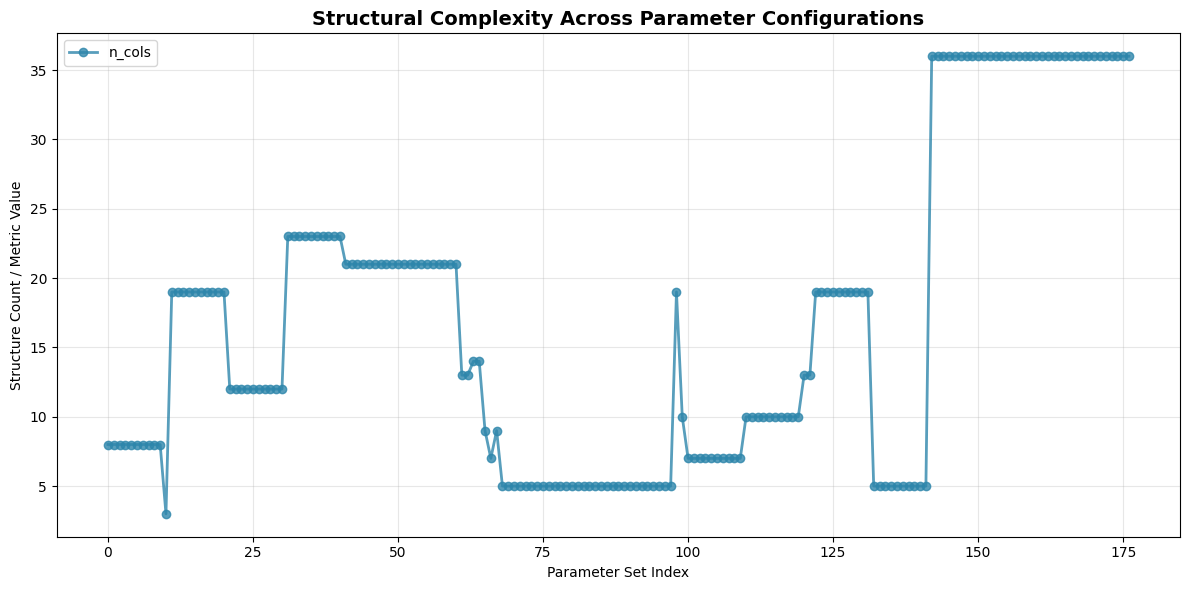

[saved] structure_complexity_analysis.png/.pdf


[saved] summary_counts.csv/.tex

STRUCTURAL DENSITY ANALYSIS
Average counts by timeframe:
     Segments  Zhongshu  Zhongshu_Ratio
TF                                     
15m     186.0      36.0           0.192
1h       71.0      15.5           0.221
30m     123.5      26.0           0.208
4h       18.5       4.5           0.247
5m      260.0      45.5           0.170


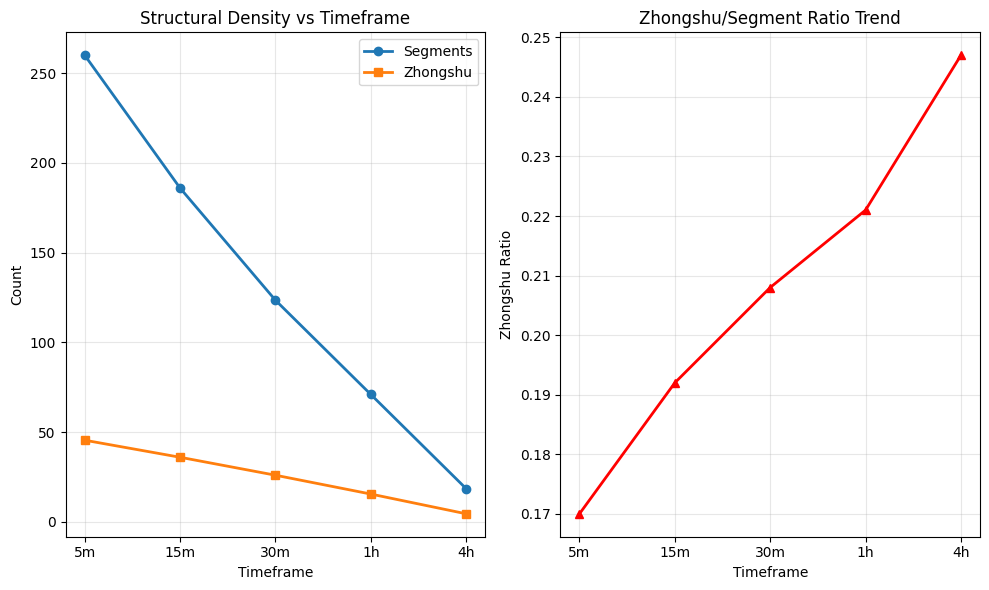

[saved] timeframe_trend_analysis.png


In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ROOT = Path.cwd().resolve()
STRUCT_REPORT = ROOT / "chan_structure_report.csv"
SEG_FAST = ROOT / "chan_data/segments/fast"
ZS_FAST  = ROOT / "chan_data/zhongshu_hierarchy_fast"
SIGNALS  = ROOT / "chan_data/signals"
DATA     = ROOT / "DATA"

symbols = ["BTCUSDT", "ETHUSDT"]
tfs = ["5m","15m","30m","1h","4h"]

out_fig = ROOT / "reports" / "figures"
out_tbl = ROOT / "reports" / "tables"
out_fig.mkdir(parents=True, exist_ok=True)
out_tbl.mkdir(parents=True, exist_ok=True)

try:
    df_report = pd.read_csv(STRUCT_REPORT)

    plt.figure(figsize=(12, 6))
    colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#3F7CAC']

    numeric_cols = df_report.select_dtypes(include=[np.number]).columns.tolist()

    if len(numeric_cols) > 0:
        for i, col in enumerate(numeric_cols[:3]):
            plt.plot(range(len(df_report)), df_report[col],
                    marker="o", lw=2, alpha=0.8, color=colors[i % len(colors)],
                    label=col)
        plt.legend()
    else:
        plt.plot(range(len(df_report)), df_report["n_cols"],
                marker="s", lw=2, alpha=0.8, color=colors[0],
                label="Structure Count")

    plt.title("Structural Complexity Across Parameter Configurations", fontsize=14, fontweight='bold')
    plt.xlabel("Parameter Set Index")
    plt.ylabel("Structure Count / Metric Value")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()

    plt.savefig(out_fig / "structure_complexity_analysis.png", dpi=300, bbox_inches='tight')
    plt.savefig(out_fig / "structure_complexity_analysis.pdf", bbox_inches='tight')
    plt.show()

    print("[saved] structure_complexity_analysis.png/.pdf")

except Exception as e:
    print(f"[warn] Structure plot failed: {e}")

rows = []
for sym in symbols:
    for tf in tfs:
        p_seg = SEG_FAST / sym / f"{tf}_segments.csv"
        p_zs  = ZS_FAST  / sym / f"{tf}_L1.csv"
        p_sig = SIGNALS  / "trading" / sym / "multi_tf_trading_signals.csv"

        seg_n = pd.read_csv(p_seg).shape[0] if p_seg.exists() else 0
        zs_n  = pd.read_csv(p_zs).shape[0]  if p_zs.exists()  else 0
        sig_n = pd.read_csv(p_sig).shape[0] if p_sig.exists() else 0

        seg_to_zs = round(seg_n / zs_n, 2) if zs_n > 0 else 0
        zs_ratio = round(zs_n / seg_n, 3) if seg_n > 0 else 0

        rows.append({
            'Symbol': sym,
            'TF': tf,
            'Segments': seg_n,
            'Zhongshu': zs_n,
            'Segments/Zhongshu': seg_to_zs,
            'Zhongshu_Ratio': zs_ratio,
            'Signals': sig_n
        })

df_sum = pd.DataFrame(rows)

styled_df = df_sum.style \
    .background_gradient(subset=['Segments', 'Zhongshu'], cmap='Blues') \
    .background_gradient(subset=['Zhongshu_Ratio'], cmap='YlOrRd') \
    .format({'Zhongshu_Ratio': '{:.3f}'}) \
    .set_caption('Table 1. Structural Elements Count by Symbol and Timeframe')

display(styled_df)

df_sum.to_csv(out_tbl / "summary_counts.csv", index=False)
df_sum.to_latex(out_tbl / "summary_counts.tex", index=False, float_format="%.3f")

print("[saved] summary_counts.csv/.tex")

print("\n" + "="*50)
print("STRUCTURAL DENSITY ANALYSIS")
print("="*50)

tf_analysis = df_sum.groupby('TF')[['Segments', 'Zhongshu', 'Zhongshu_Ratio']].mean().round(3)
print("Average counts by timeframe:")
print(tf_analysis)

plt.figure(figsize=(10, 6))
tf_order = ['5m', '15m', '30m', '1h', '4h']
tf_analysis_reindexed = tf_analysis.reindex(tf_order)

plt.subplot(1, 2, 1)
plt.plot(tf_order, tf_analysis_reindexed['Segments'], 'o-', label='Segments', linewidth=2)
plt.plot(tf_order, tf_analysis_reindexed['Zhongshu'], 's-', label='Zhongshu', linewidth=2)
plt.xlabel('Timeframe')
plt.ylabel('Count')
plt.title('Structural Density vs Timeframe')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(tf_order, tf_analysis_reindexed['Zhongshu_Ratio'], '^-', color='red', linewidth=2)
plt.xlabel('Timeframe')
plt.ylabel('Zhongshu Ratio')
plt.title('Zhongshu/Segment Ratio Trend')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(out_fig / "timeframe_trend_analysis.png", dpi=300, bbox_inches='tight')
plt.show()

print("[saved] timeframe_trend_analysis.png")

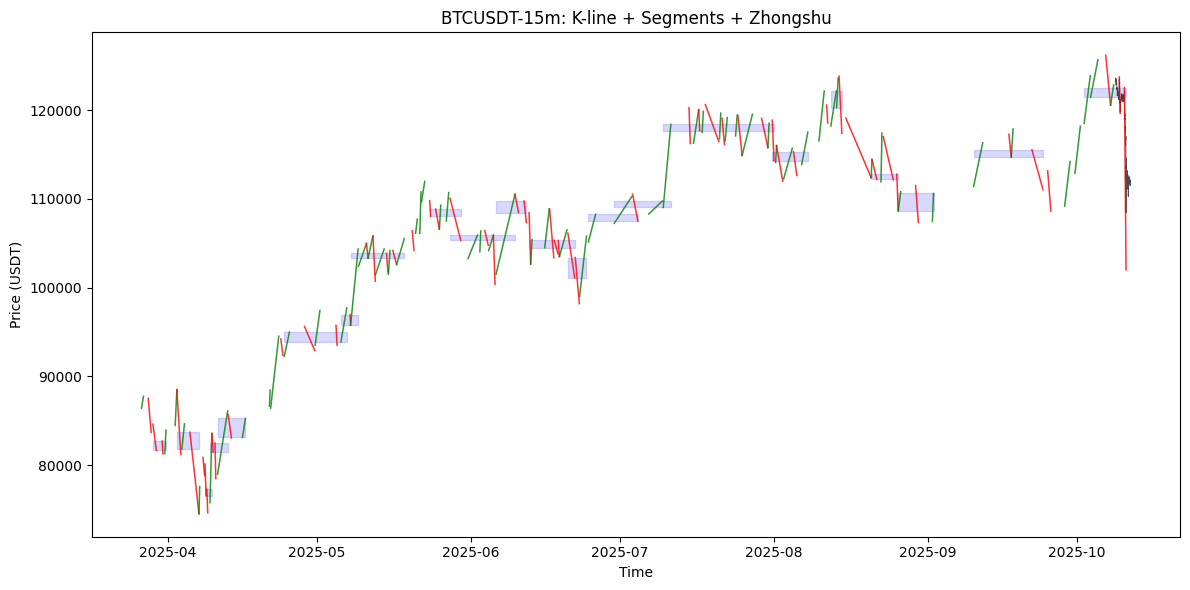

In [29]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

SYMBOL, TF = "BTCUSDT", "15m"
ROOT = Path.cwd().resolve()
DATA = ROOT / "DATA"
SEG_FAST = ROOT / "chan_data/segments/fast"
ZS_FAST  = ROOT / "chan_data/zhongshu_hierarchy_fast"
out_dir  = ROOT / "reports/figures"; out_dir.mkdir(parents=True, exist_ok=True)

p_candle = DATA / SYMBOL / f"{TF}.csv"
p_seg = SEG_FAST / SYMBOL / f"{TF}_segments.csv"
p_zs  = ZS_FAST  / SYMBOL / f"{TF}_L1.csv"

df_c = pd.read_csv(p_candle)
df_s = pd.read_csv(p_seg)
df_z = pd.read_csv(p_zs)

df_c["timestamp"] = pd.to_datetime(df_c["timestamp"])
cutoff = df_c["timestamp"].max() - pd.Timedelta(days=3)
df_c = df_c[df_c["timestamp"] >= cutoff]

for col in ["timestamp_start", "timestamp_end"]:
    if pd.api.types.is_datetime64_any_dtype(df_s[col]):
        df_s[col] = df_s[col].dt.tz_localize(None)
    else:
        df_s[col] = pd.to_datetime(df_s[col], errors="coerce").dt.tz_localize(None)

for col in ["timestamp_start", "timestamp_end"]:
    if pd.api.types.is_datetime64_any_dtype(df_z[col]):
        df_z[col] = df_z[col].dt.tz_localize(None)
    else:
        df_z[col] = pd.to_datetime(df_z[col], errors="coerce").dt.tz_localize(None)


plt.figure(figsize=(12,6))
plt.plot(df_c["timestamp"], df_c["close"], lw=0.6, color="black", alpha=0.7, label="Close")
for _, r in df_s.iterrows():
    col = "green" if r["direction"].lower()=="up" else "red"
    plt.plot([r["timestamp_start"],r["timestamp_end"]],
             [r["start_price"],r["end_price"]], color=col, lw=1.1, alpha=0.8)
for _, r in df_z.iterrows():
    plt.fill_betweenx([r["zs_low"],r["zs_high"]],
                      r["timestamp_start"],r["timestamp_end"],
                      color="blue", alpha=0.15)
plt.title(f"{SYMBOL}-{TF}: K-line + Segments + Zhongshu")
plt.xlabel("Time"); plt.ylabel("Price (USDT)"); plt.tight_layout()

plt.savefig(out_dir / f"{SYMBOL}_{TF}_geometry.png", dpi=180, bbox_inches="tight")
plt.show()

[saved] BTCUSDT_15m_signals.png


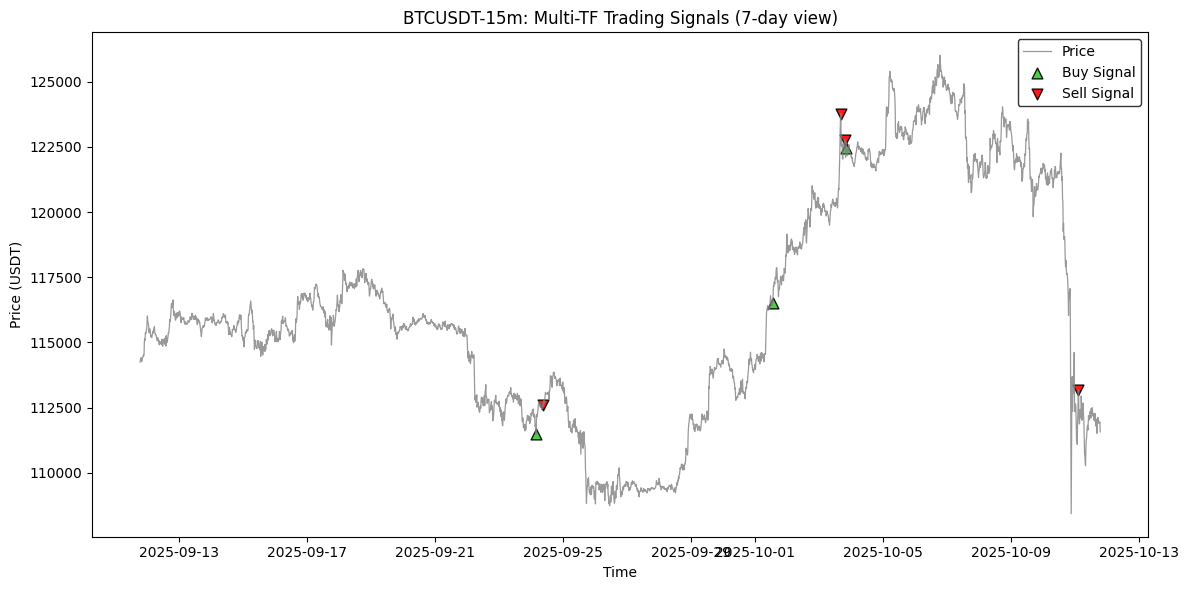

In [27]:
# === Optimized Multi-TF Trading Signal Plot ===
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

SYMBOL, TF = "BTCUSDT", "15m"
ROOT = Path.cwd().resolve()
DATA = ROOT / "DATA"
SIGNALS = ROOT / "chan_data/signals/trading"
out_dir = ROOT / "reports/figures"; out_dir.mkdir(parents=True, exist_ok=True)

p_sig = SIGNALS / SYMBOL / "multi_tf_trading_signals.csv"
p_c   = DATA / SYMBOL / f"{TF}.csv"

df_c = pd.read_csv(p_c)
df_s = pd.read_csv(p_sig)
df_s = df_s[df_s["tf"] == TF]

df_c["timestamp"] = pd.to_datetime(df_c["timestamp"], errors="coerce").dt.tz_localize(None)
df_s["ts"] = pd.to_datetime(df_s["ts"], errors="coerce").dt.tz_localize(None)

cutoff = df_c["timestamp"].max() - pd.Timedelta(days=30)
df_c = df_c[df_c["timestamp"] >= cutoff]
df_s = df_s[df_s["ts"] >= cutoff]

plt.figure(figsize=(12,6))
plt.style.use("default")
plt.plot(df_c["timestamp"], df_c["close"], color="gray", lw=0.9, alpha=0.8, label="Price")

buys = df_s[df_s["side"] == "buy"]
sells = df_s[df_s["side"] == "sell"]

plt.scatter(buys["ts"], buys["price"], marker="^", color="limegreen", s=60, alpha=0.9, edgecolor="black", label="Buy Signal")
plt.scatter(sells["ts"], sells["price"], marker="v", color="red", s=60, alpha=0.9, edgecolor="black", label="Sell Signal")

plt.title(f"{SYMBOL}-{TF}: Multi-TF Trading Signals (7-day view)")
plt.xlabel("Time"); plt.ylabel("Price (USDT)")
plt.legend(frameon=True, facecolor="white", edgecolor="black")
plt.tight_layout()
plt.savefig(out_dir / f"{SYMBOL}_{TF}_signals.png", dpi=180, bbox_inches="tight")
print(f"[saved] {SYMBOL}_{TF}_signals.png")
plt.show()